In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
delf=10
rf=range(1000,2010,delf)
ar=[]
for fr in rf:
    fname='Gain %i MHz phi=0.csv'%fr
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1,sep=';')
    dum=dum[np.isfinite(dum.gain)]
    ar+=[list(dum.gain)]
ar=np.array(ar)

In [8]:
rt=list(dum.theta)
rt=np.array(rt)
rf=np.array(rf)

/tmp/ipykernel_475/2443848551.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x,y,ar,cmap='jet')


Text(0.5, 0, '$\\theta$ ($^\\circ$)')

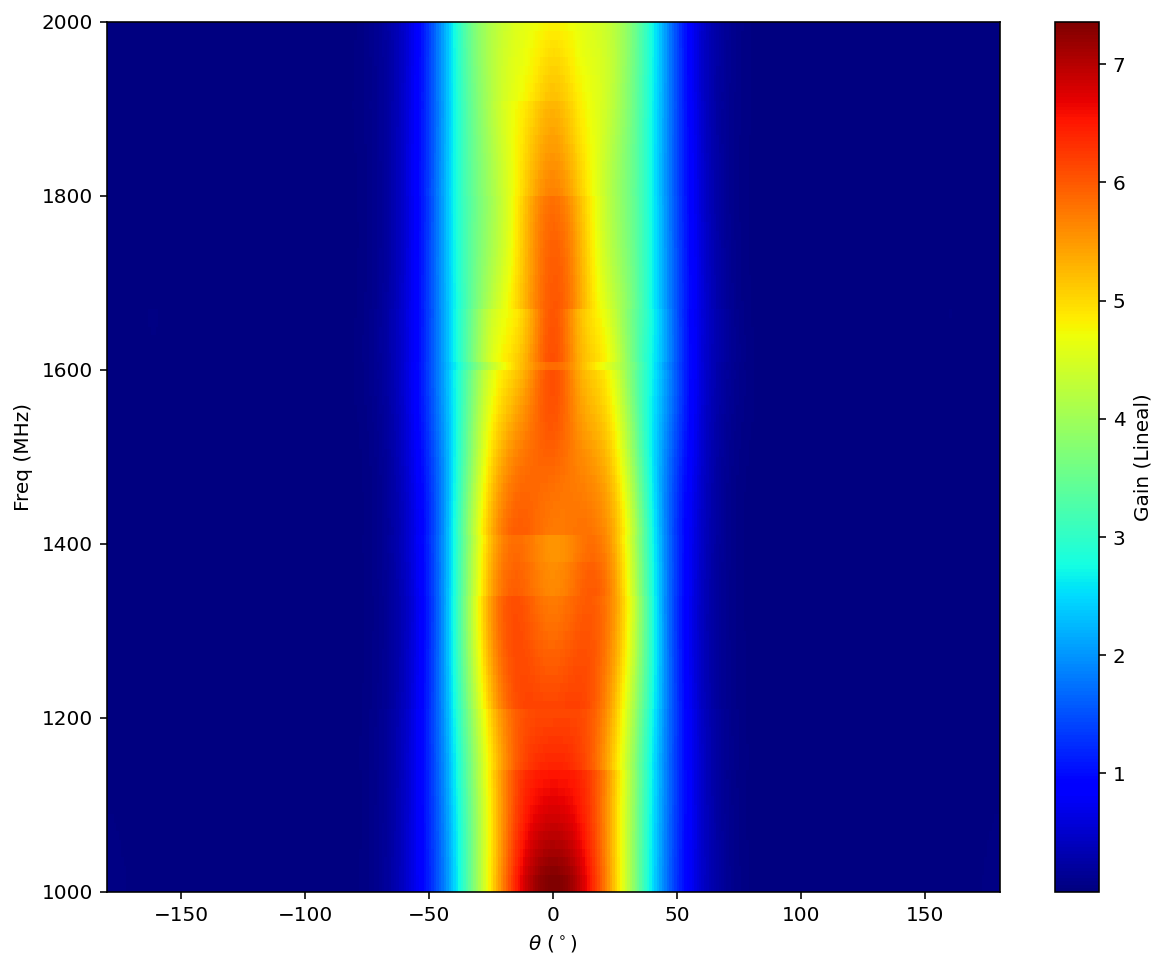

In [9]:
#calculo de la ganancia de la antena vs la frecuencia y el ángulo de elevación (forma normal)
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rf)
plt.pcolor(x,y,ar,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Dipologainphi0')

/tmp/ipykernel_475/2278078320.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x,y,deriv[0],cmap='jet')


Text(0.5, 0, '$\\theta$ ($^\\circ$)')

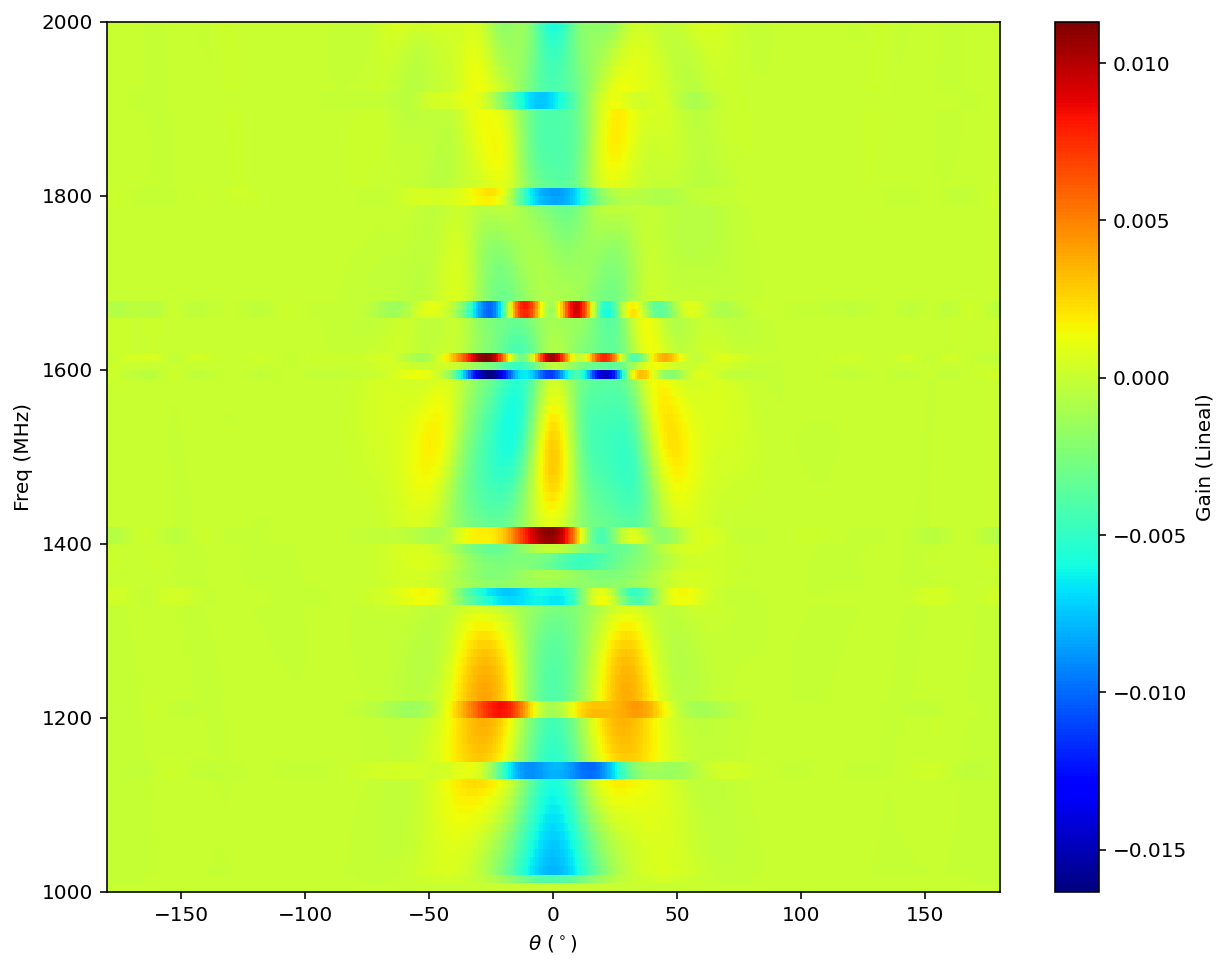

In [10]:
#derivada de la ganancia vs la frecuencia y el ángulo de elevación (forma normal)
deriv=np.gradient(ar,delf)
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rf)
plt.pcolor(x,y,deriv[0],cmap='jet')
plt.xlim=(0,90)
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Derivadagainphi0')

Text(0.5, 0, '$\\theta$ ($^\\circ$)')

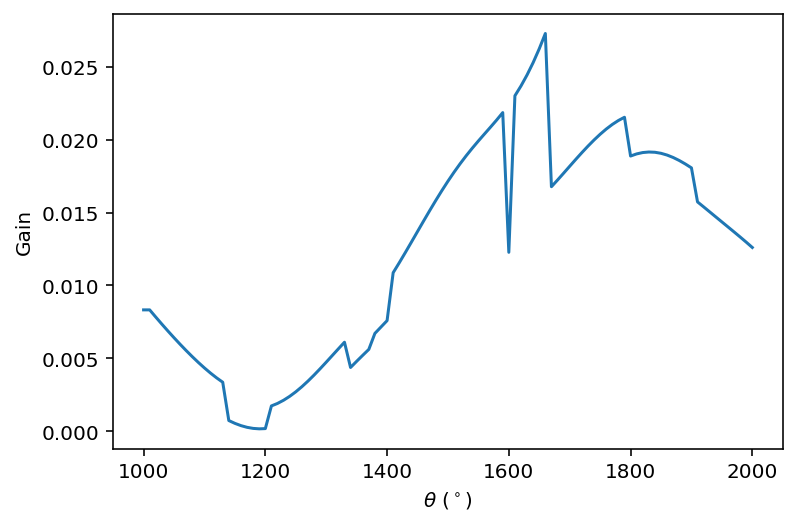

In [11]:
#corte en un ángulo para ver el comportamiento de la ganancia 
te=16
ga=ar[:,te]
plt.plot(rf,ga)
plt.ylabel('Gain')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('corteDipologainphi0')

In [12]:
# primera forma de interpolar 
spl = interpolate.UnivariateSpline(rf, ga)
spl.set_smoothing_factor(0.2)

In [13]:
#para graficar los datos interpolados
delspl=0.2
rfspl=np.arange(1000,1050,delspl)

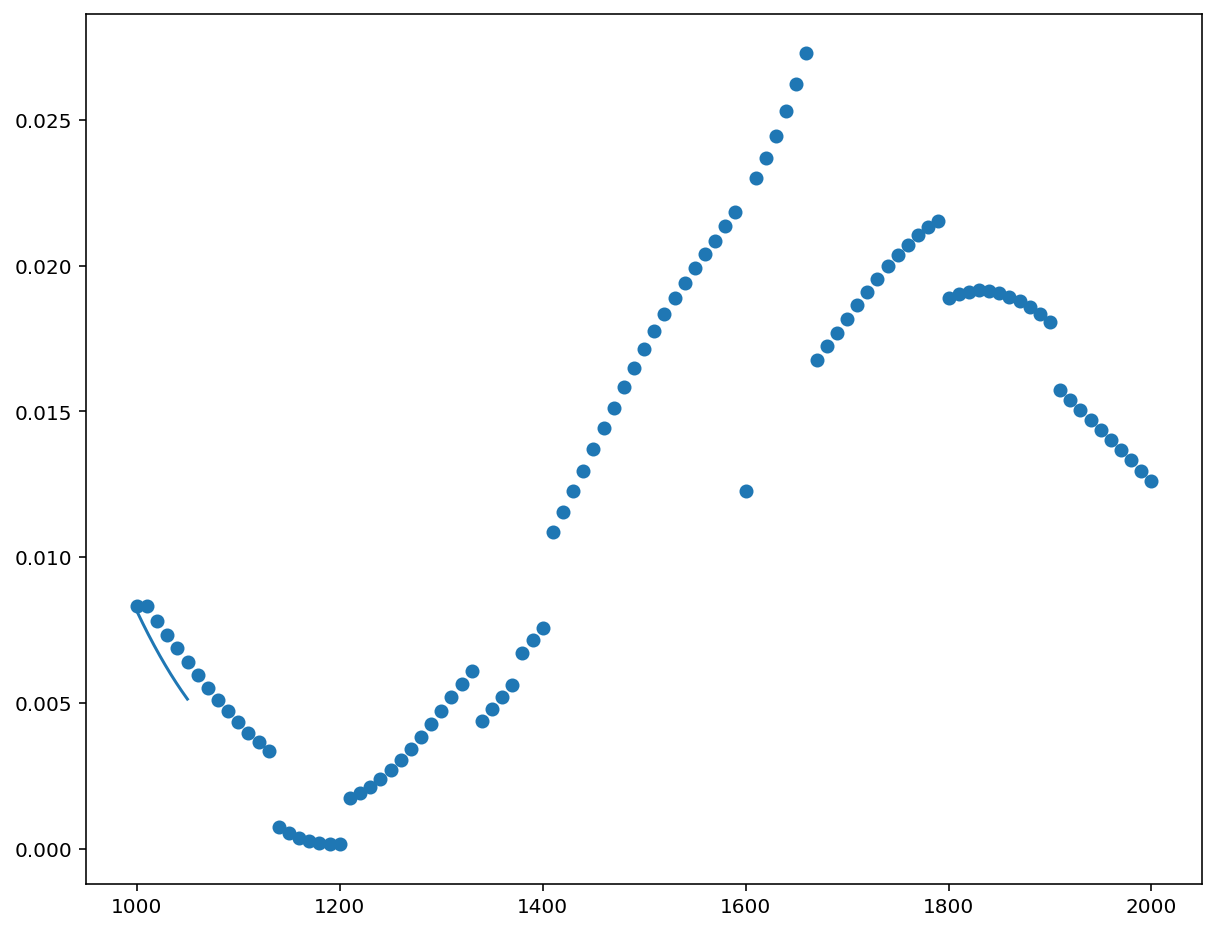

In [14]:
#esta gráfica según lo establecido antes 
plt.figure(figsize=(10,8))
plt.scatter(rf,ga)
plt.plot(rfspl,spl(rfspl))
#plt.savefig('Dipolointerpoladogainphi0')
#plt.xlim(70,90)

In [15]:
arspl=[]
for t in range(ar.shape[1]):
    ga=ar[:,t]
    spl = interpolate.UnivariateSpline(rf, ga)
    spl.set_smoothing_factor(0.8)
    arspl+=[spl(rfspl)]
arspl=np.array(arspl)

/tmp/ipykernel_475/1600654761.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x,y,arspl.T,cmap='jet')


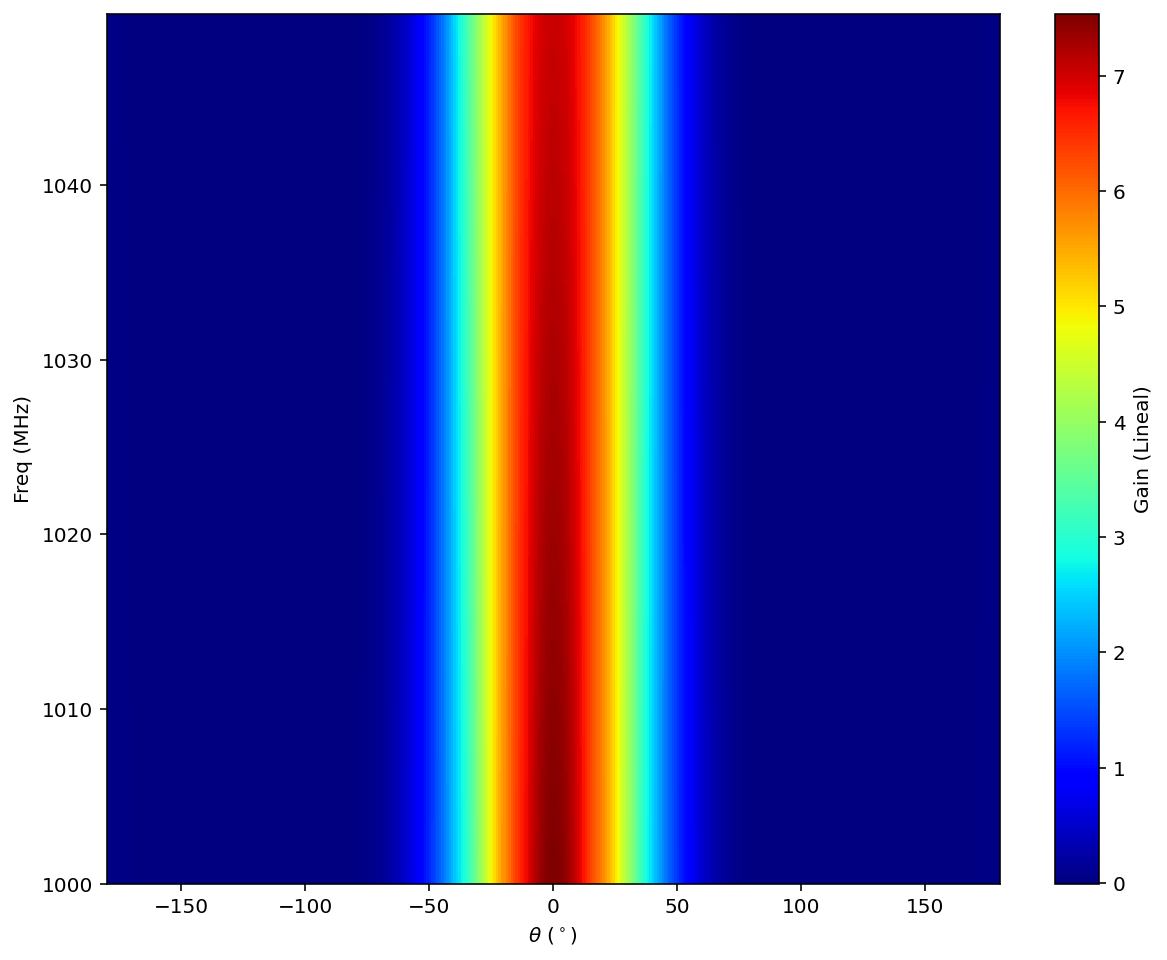

In [16]:
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rfspl)
plt.pcolor(x,y,arspl.T,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
plt.savefig('Dipoloderivadainterpoladogainphi0')

In [17]:
bvsp=interpolate.RectBivariateSpline(rf,rt,ar,s=8)
dx2, dy2 = 0.1, 0.1
x2 = np.arange(-90, 90, dx2)
x2 = np.arange(0, rt.max(), dx2)
y2 = np.arange(rf.min(), rf.max(), dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = bvsp(y2, x2)

In [18]:
y2 = np.arange(1000, 2000, dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = bvsp(y2, x2)

In [19]:
plt.figure(figsize=(8,6))
plt.pcolor(X2,Y2,Z2,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
#plt.tick_params(axis='both', which='major', labelsize=15)
#plt.ylim(40,120)
#plt.xlim(-89,89)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
plt.savefig('Ganancia_BLADE_Phi0')


In [1]:
gmax=Z2.max() #cálculo la ganancia máxima
derivbspl=np.gradient(Z2,dx2)
#val=max(derivbspl[0].max(),-derivbspl[0].min())
print (gmax)

NameError: name 'Z2' is not defined

In [0]:
plt.figure(figsize=(8,6))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.pcolor(x2,y2,derivbspl[0],cmap='jet',vmin=-0.05,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
#plt.ylim(40,120)
#plt.xlim(0,120)
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

plt.savefig('Derivada_BLADE_Phi0(0-90)')